In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df=pd.read_csv('SUSY-small.csv', dtype='float64',names=VarNames)

**Exercise 3**

In [8]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

N_Train=300000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]



In [9]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

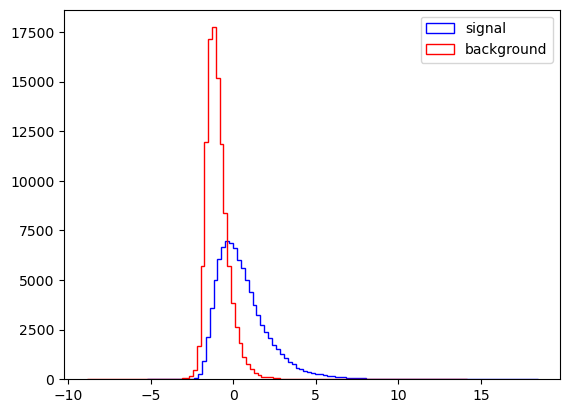

In [10]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

In [11]:
df.shape

(500000, 19)

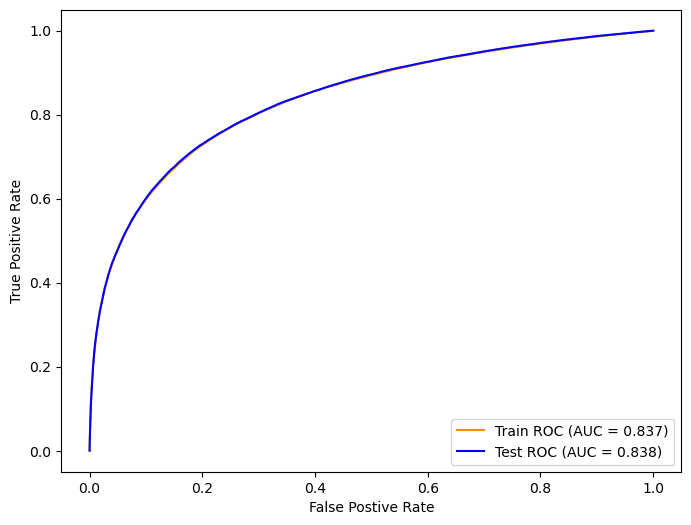

In [12]:
# Exercise 3 part a

# There apears to be no bias, the AUC difference is 0.001

from sklearn.metrics import roc_curve, auc

fpr,tpr,_=roc_curve(y_Test, Fisher.decision_function(X_Test))
auc_test=auc(fpr,tpr)

fpr_train,tpr_train,_=roc_curve(y_Train, Fisher.decision_function(X_Train))
auc_train=auc(fpr_train,tpr_train)

plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.3f})', color='darkorange')
plt.plot(fpr, tpr, label=f'Test ROC (AUC = {auc_test:.3f})', color='blue')
plt.legend(loc='lower right')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [13]:
# Exercise 3 part b

# train model on scaled features

from sklearn.preprocessing import StandardScaler
import sklearn.discriminant_analysis as DA


Fisher_R=DA.LinearDiscriminantAnalysis()
Fisher_R.fit(X_Train,y_Train)

y_train_raw=Fisher_R.decision_function(X_Train)
y_test_raw=Fisher_R.decision_function(X_Test)


scaler=StandardScaler()

X_Train_scale=scaler.fit_transform(X_Train)
X_Test_scale=scaler.transform(X_Test)

Fisher_A=DA.LinearDiscriminantAnalysis()
Fisher_A.fit(X_Train_scale, y_Train)

y_train_scale=Fisher_A.decision_function(X_Train_scale)
y_test_scale=Fisher_A.decision_function(X_Test_scale)



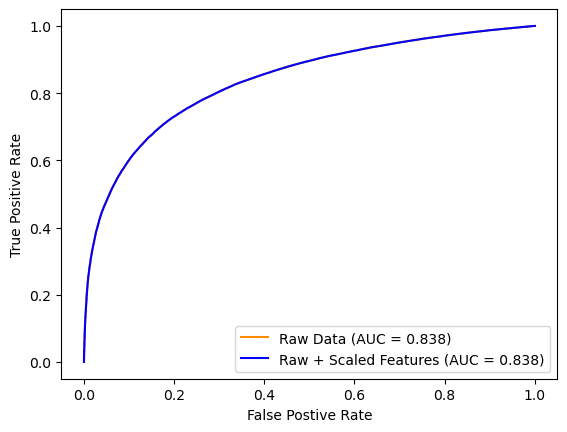

In [14]:
# Ploting


fpr_r,tpr_r,_=roc_curve(y_Test,y_test_raw)
auc_r=auc(fpr_r,tpr_r)

fpr_A,tpr_A,_=roc_curve(y_Test,y_test_scale)
auc_A=auc(fpr_A,tpr_A)

plt.plot(fpr_r,tpr_r,label=f'Raw Data (AUC = {auc_r:.3f})', color='darkorange')
plt.plot(fpr_A,tpr_A,label=f'Raw + Scaled Features (AUC = {auc_A:.3f})', color='blue')
plt.legend(loc='lower right')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.show()


**Exercise 4**

In [15]:
#part a training models

from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


# gradient boosting

gb = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
gb.fit(X_Train, y_Train)
y_pred_gb = gb.predict(X_Test)
acc_gb = accuracy_score(y_Test, y_pred_gb)


In [16]:
from sklearn.ensemble import RandomForestClassifier
#random forest
rf=RandomForestClassifier()
rf.fit(X_Train, y_Train)

y_pred_test=rf.predict(X_Test)
acc_rf=accuracy_score(y_Test, y_pred_test)

In [17]:
#linear discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()
lda.fit(X_Train, y_Train)
y_pred_lda=lda.predict(X_Test)
acc_lda=accuracy_score(y_Test, y_pred_lda)

In [18]:
# Testing accuracy for models
print(acc_gb)
print(acc_rf)
print(acc_lda)


0.798275
0.79905
0.7579


In [22]:
#part b

def classifier(X_train, X_test, y_train, y_test):
    rf=RandomForestClassifier()
    rf.fit(X_train, y_train)
    
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    rf.fit(X_train_scaled,y_train)
    
    y_proba_scaled = rf.predict_proba(X_test_scaled)[:, 1]
    fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_proba_scaled)
    auc_scaled = auc(fpr_scaled, tpr_scaled)

    plt.plot(fpr_raw, tpr_raw, label=f'Raw AUC = {auc_raw:.3f}')
    plt.plot(fpr_scaled, tpr_scaled, label=f'Scaled AUC = {auc_scaled:.3f}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    

In [ ]:
#Testing
classifier(X_Train, X_Test, y_Train, y_Test)

**Exercise 5**

In [ ]:
#part b
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from IPython.display import HTML, display
from tabulate import tabulate
import numpy as np


cm_gb=confusion_matrix(y_Test, y_pred_gb)
TP_gb,TN_gb,FP_gb,FN_gb=cm_gb.ravel()

acc_gb=accuracy_score(y_Test, y_pred_gb)
prec_gb=precision_score(y_Test, y_pred_gb)
rec_gb=recall_score(y_Test, y_pred_gb)
fpr_gb=FP_gb/(FP_gb+TN_gb)
f1_gb=f1_score(y_Test, y_pred_gb)
auc_gb=roc_auc_score(y_Test, y_proba_gb)
sig_gb=TP_gb/np.sqrt(FP_gb) if FP_gb>0 else 0



cm_rf=confusion_matrix(y_Test, y_pred_rf)
TP_rf,TN_rf,FP_rf,FN_rf=cm_rf.ravel()

acc_rf=accuracy_score(y_Test, y_pred_rf)
prec_rf=precision_score(y_Test, y_pred_rf)
rec_rf=recall_score(y_Test, y_pred_rf)
fpr_rf=FP_rf/(FP_rf+TN_rf)
f1_rf=f1_score(y_Test, y_pred_rf)
auc_rf=roc_auc_score(y_Test, y_proba_rf)
sig_rf=TP_rf/np.sqrt(FP_rf) if FP_rf>0 else 0



cm_lda=confusion_matrix(y_Test, y_pred_lda)
TP_lda,TN_lda,FP_lda,FN_lda=cm_lda.ravel()

acc_lda=accuracy_score(y_Test, y_pred_lda)
prec_lda=precision_score(y_Test, y_pred_lda)
rec_lda=recall_score(y_Test, y_pred_lda)
fpr_lda=FP_lda/(FP_lda+TN_lda)
f1_lda=f1_score(y_Test, y_pred_lda)
auc_lda=roc_auc_score(y_Test, y_proba_lda)
sig_lda=TP_lda/np.sqrt(FP_lda) if FP_lda>0 else 0

headers = ["Model", "Accuracy", "Precision", "Recall", "FPR", "F1", "AUC"]
rows = [["Gradient Boosting"],["Random Forest"],["LDA"]]


display(HTML(tabulate(rows, headers=headers, tablefmt="html")))

